In [1]:
import numpy as np
from scipy.stats import *
from scipy.special import *
from itertools import *
from more_itertools import *
import sympy as sp
import math
import statistics as statsv
import pandas as pd
from fractions import Fraction
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
from tqdm.notebook import tqdm
import functools as ft
#########################
import locale
locale.setlocale(locale.LC_NUMERIC, 'russian')
plt.rcParams['axes.formatter.use_locale'] = True
#########
#########
plt.rcParams['font.size'] = 36
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
###################
sp.init_printing(use_unicode=True,use_latex=True)

# 6.1

In [55]:
xk = np.array([7, 8, 11, 14, 15])
pk = np.array([0.25, 0.2, 0.1, 0.2, 0.25])
X = rv_discrete(values=(xk, pk))
print(X.mean())
print(X.var()**0.5)
stat = 0
for x in xk:
    if abs(x-X.mean()) < X.var()**0.5:
        stat += X.pmf(x)
        
print(stat)

11.0
3.4058772731852835
0.5


# 6.2

In [65]:
xk = np.array([0, 1])
pk = np.array([0.4, 0.6])
X = rv_discrete(values=(xk, pk))

In [75]:
w = []
pw = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            for y in range(2):
                w.append(2**(i+j+k+y))
                pw.append(X.pmf(i)*X.pmf(j)*X.pmf(k)*X.pmf(y))
W = rv_discrete(values=(w, pw))
W.mean()

[1, 2, 2, 4, 2, 4, 4, 8, 2, 4, 4, 8, 4, 8, 8, 16]


In [76]:
w = dict()

for i in range(2):
    for j in range(2):
        for k in range(2):
            for y in range(2):
                try:
                    w[2**(i+j+k+y)]+=X.pmf(i)*X.pmf(j)*X.pmf(k)*X.pmf(y)
                except:
                    w[2**(i+j+k+y)]=X.pmf(i)*X.pmf(j)*X.pmf(k)*X.pmf(y)
W = rv_discrete(values=(list(w.keys()),list(w.values()) ))
W.mean()

# 6.3

In [77]:
xk = np.arange(-6, 5)
pk = np.array([1/11]*11)
X = rv_discrete(values=(xk, pk))

In [79]:
round(X.mean()**10)

# 6.4

In [85]:
xk = np.array([0, 1])
pk = np.array([0.7, 0.3])
X = rv_discrete(values=(xk, pk))

In [153]:
sy = [i**2 for i in range(91)]
psy = [comb(90, i) * 0.7**(90-i)*0.3**i for i in range(91)]
Y = rv_discrete(values=(sy, psy))
Y.mean().round(2)

# 6.5

Как известно, дисперсия произведения некореллированных величин вычисляется по формуле:
<br>$Var(XY)=Var(X)Var(Y)+(\mathbb{E}[X])^2Var(Y)+(\mathbb{E}[Y])^2Var(X)$ 
<br>что в нашем случае равно:
<br>$Var(X_1 X_2)=Var(X_1)Var(X_2)+(\mathbb{E}[X_1])^2Var(X_2)+(\mathbb{E}[X_2])^2Var(X_1) = Var(X_1)Var(X_2)+Var(X_2)+Var(X_1) $, так как $(\mathbb{E}[X])^2 = 1$
<br>Если считать, что все рассматриваемые события равны, то можно прийти к формуле:
<br>$Var(X_1 *...* X_4) = 15^2 + 15*2 = 255 $

# 6.6

## Via python analytics

In [75]:
x1 = np.arange(1,5)
x2 = np.arange(1,7)
x3 = np.arange(1,13)


px1 = np.full(4,1/4)
px2 = np.full(6,1/6)
px3 = np.full(12,1/12)

In [76]:
X_1 = rv_discrete(values=(x1,px1))
X_2 = rv_discrete(values=(x2,px2))
X_3 = rv_discrete(values=(x3,px3))

In [77]:
print(f'E(S) = {X_1.mean()+X_2.mean()+X_3.mean()}')

E(S) = 12.5


In [78]:
print(f'Var(S) = {X_1.var()+X_2.var()+X_3.var()}')

Var(S) = 16.08333333333332


## Experiment

In [79]:
x1 = np.arange(1,5)
x2 = np.arange(1,7)
x3 = np.arange(1,13)


px1 = np.full(4,1/4)
px2 = np.full(6,1/6)
px3 = np.full(12,1/12)

X_1 = rv_discrete(values=(x1,px1))
X_2 = rv_discrete(values=(x2,px2))
X_3 = rv_discrete(values=(x3,px3))

In [80]:
N=100_000
x = list(range(1,N+1))
hel = [(X_1.rvs()+X_2.rvs()+X_3.rvs()) for n in tqdm(range(1,N+1))]
y = [sum(hel[0:i])/i for i in tqdm(range(1,N+1))]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

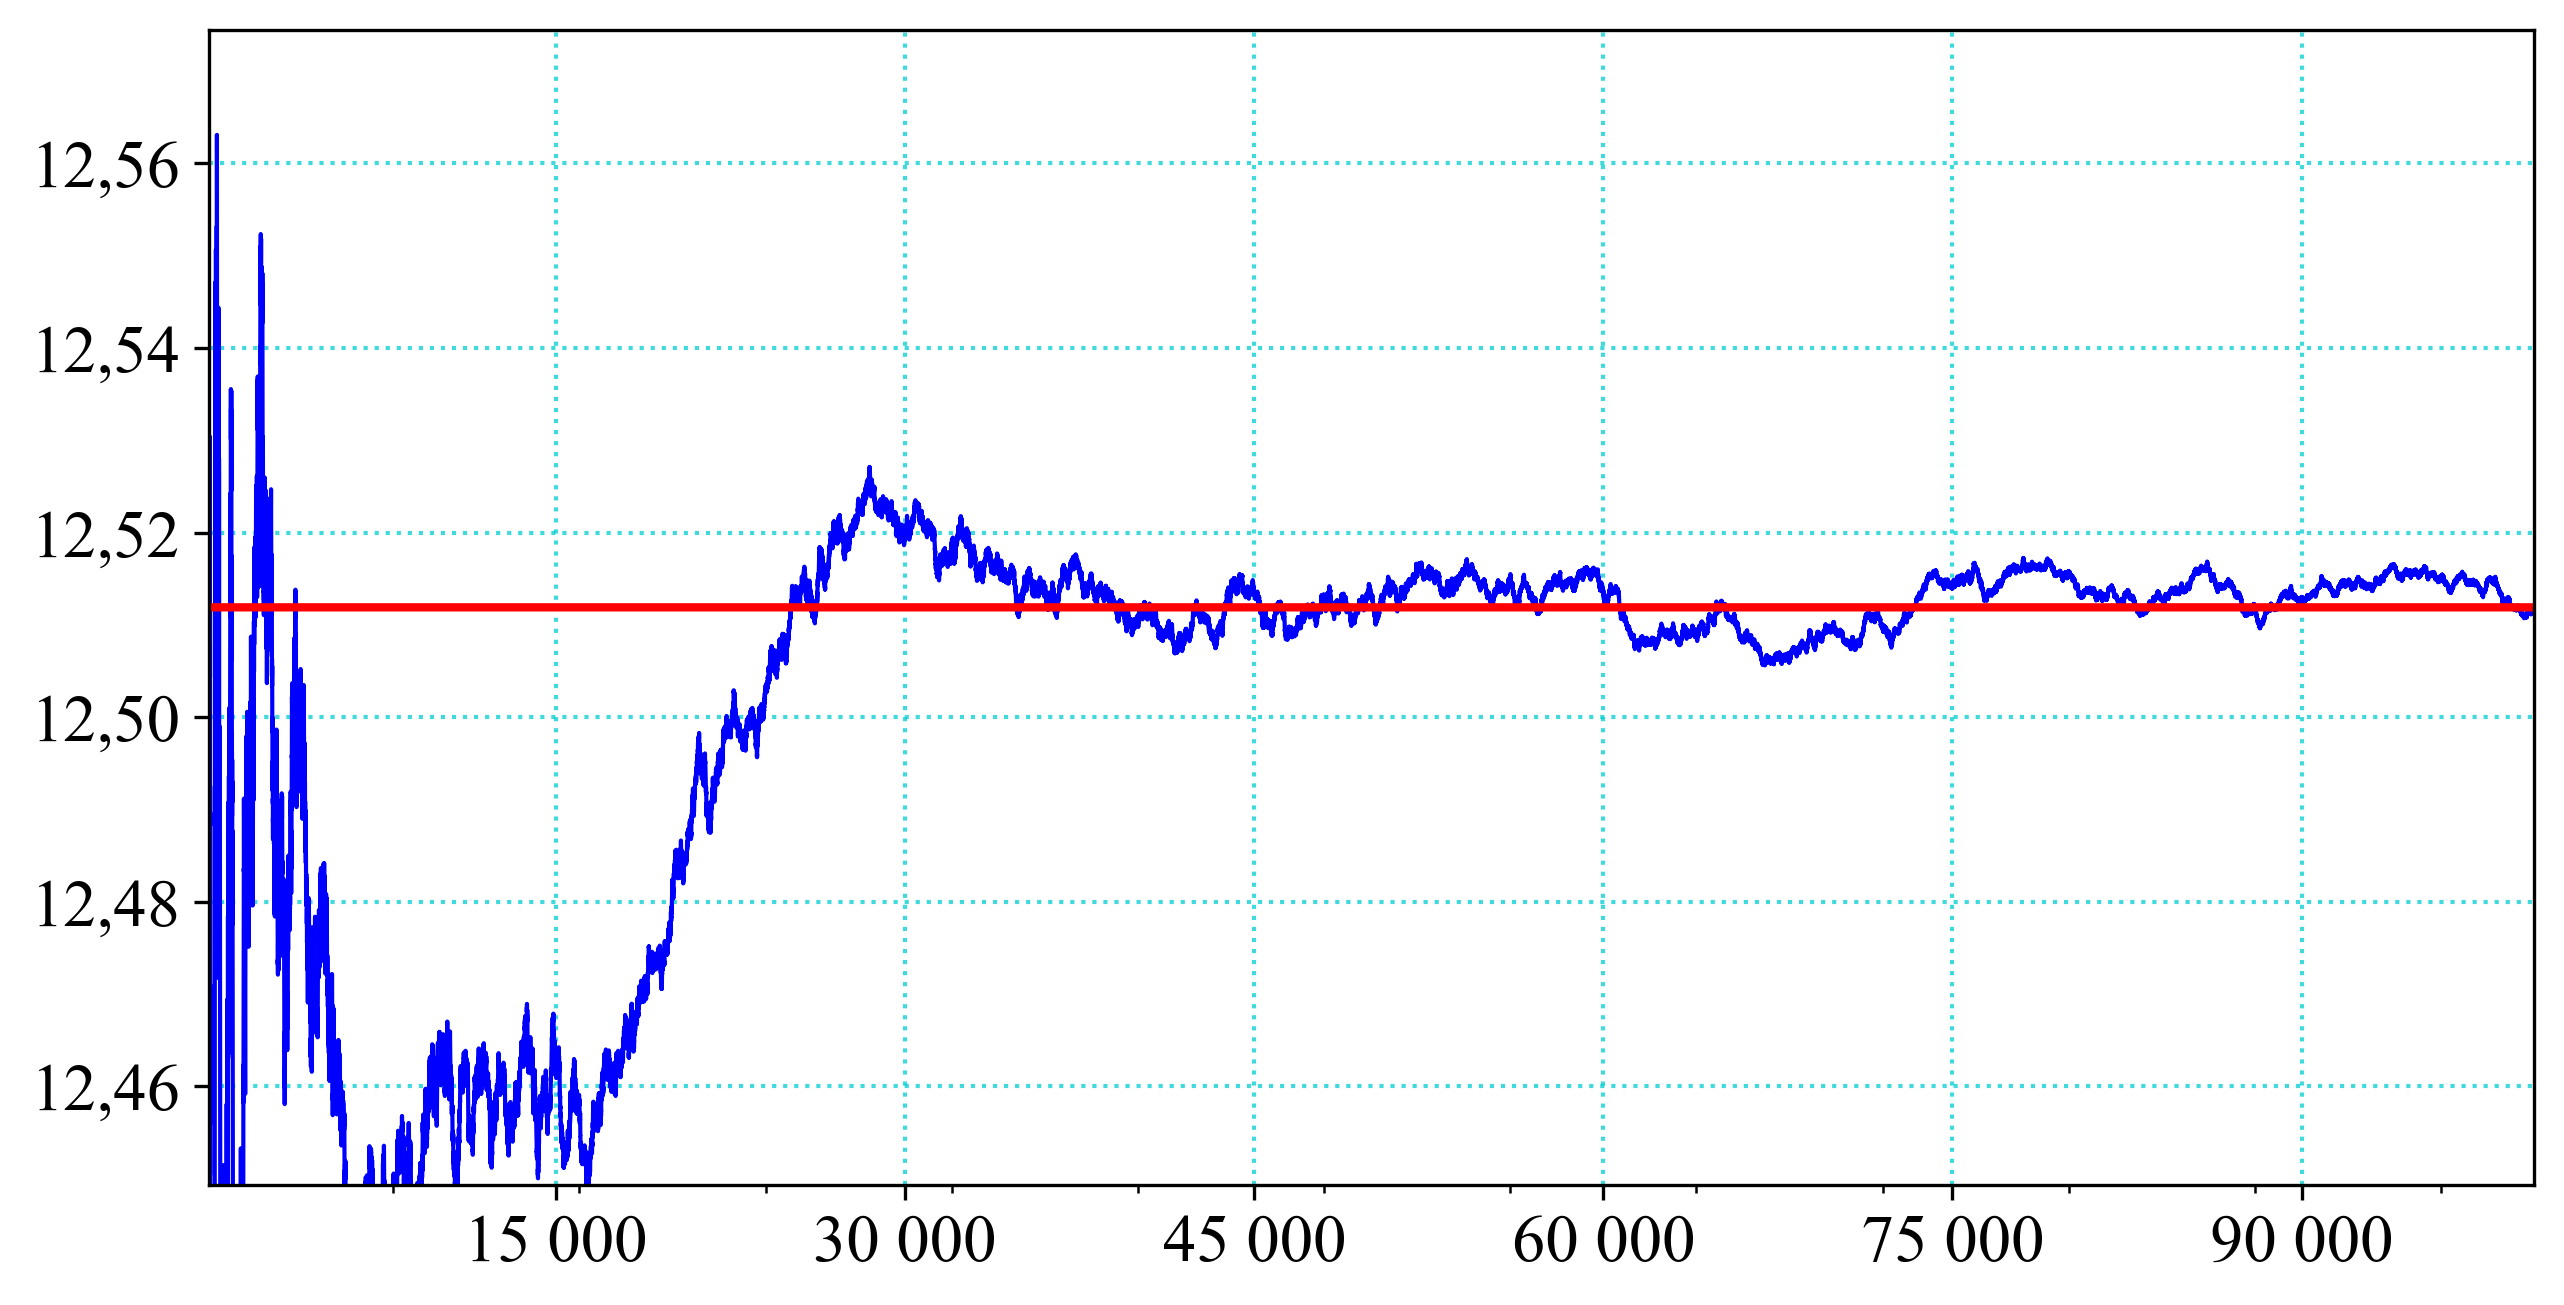

12.5119


In [81]:
rcParams['figure.figsize'] = (15, 5)
rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(labelsize=16)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(15))

plt.ylim(y[-1]*0.995, y[-1]*1.005)
plt.xlim(100, N)
plt.plot(x, y, color='b', lw=1)
plt.plot(x,[y[-1]]*len(x),color='r',lw=2)
plt.show()
print(y[-1])

# 6.7

## Analysis

In [67]:
x = np.arange(1,7)
px=np.full(6,1/6)

In [68]:
X = rv_discrete(values=(x,px))

In [69]:
y = []
py = []

for m in range(1, 7):
    prob = 0

    for i in range(6):
        for j in range(6):
            for k in range(6):
                for l in range(6):
                    if min((x[i], x[j], x[k], x[l]))==m:
                        prob += X.pmf(x[i]) * X.pmf(x[j]) * X.pmf(x[k]) * X.pmf(x[l])
    
    y.append(m)
    py.append(prob.round(5))

Y = rv_discrete(values=(y,py))

In [70]:
Y.mean()

In [71]:
Y.var()

## Experiment

In [72]:
N=100_000
x = list(range(1,N+1))
hel = np.array([Y.rvs() for n in tqdm(range(1,N+1))])
le = np.array([sum(hel[0:i]) for i in tqdm(range(1,N+1))])
y = np.array([le[i-1]/i for i in tqdm(range(1,N+1))])

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

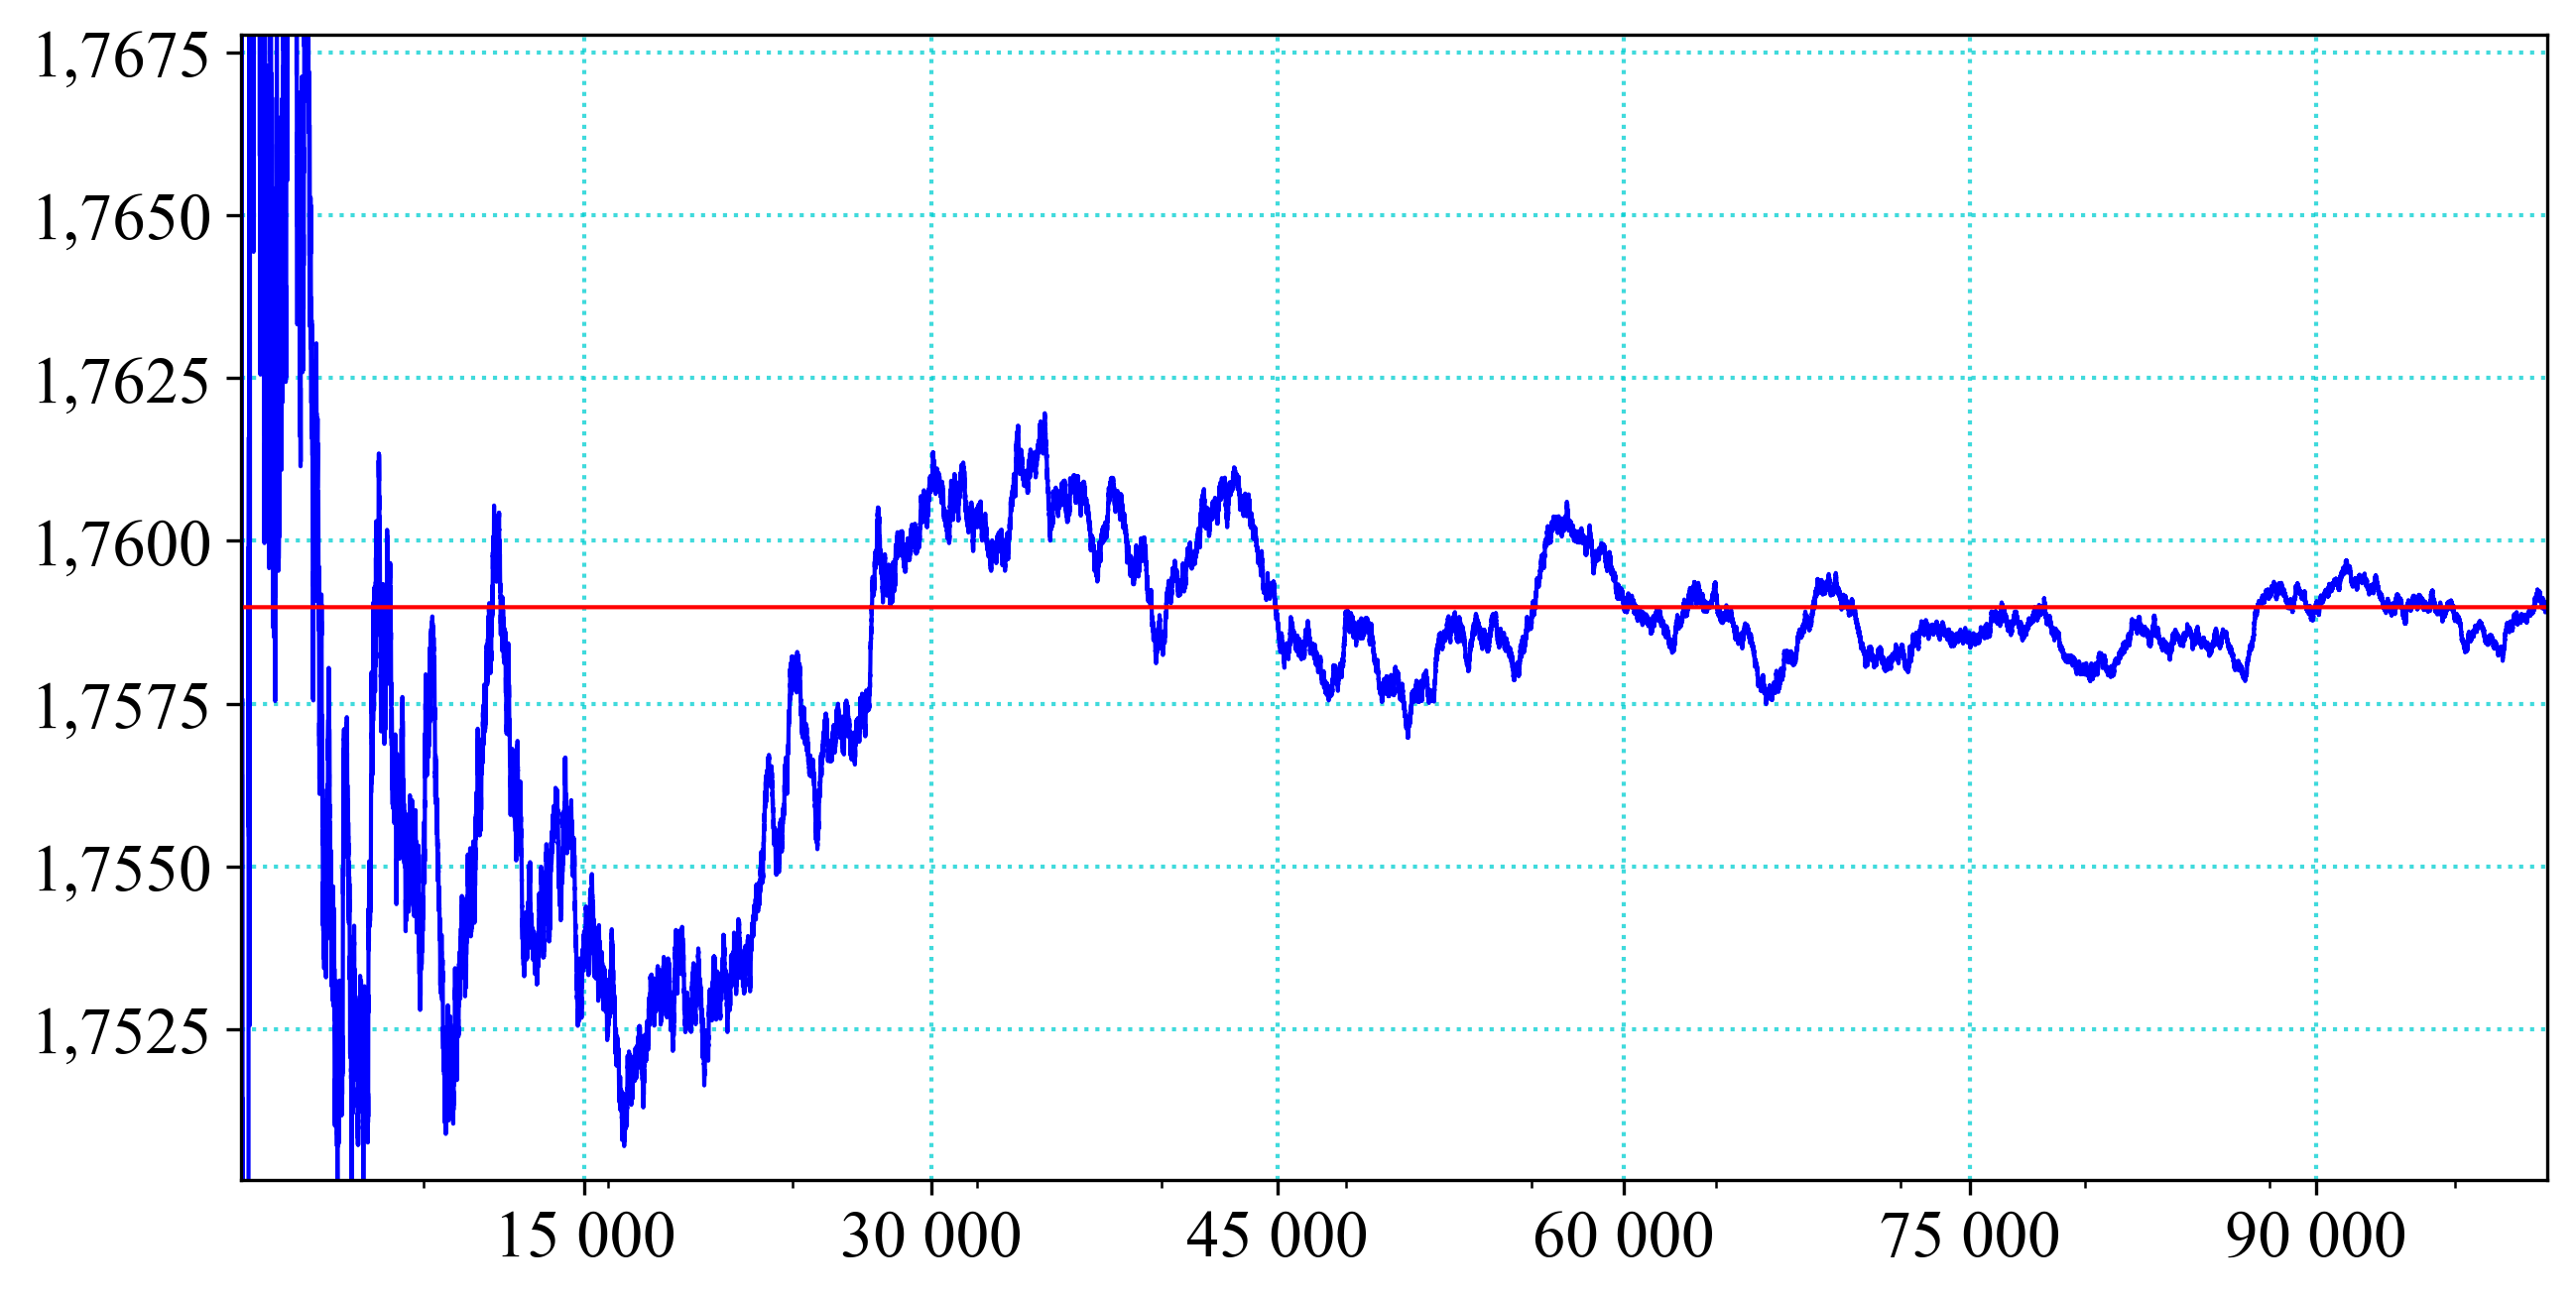

1.75898


In [73]:
rcParams['figure.figsize'] = (15, 5)
rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(labelsize=16)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(15))

plt.ylim(y[-1]*0.995, y[-1]*1.005)
plt.xlim(100, N)
plt.plot(x, y, color='b', lw=1)
plt.plot(x,[y[-1]]*len(x),color='r',lw=1)
plt.show()
print(y[-1])

# 6.8

## Analysis

In [55]:
x = np.arange(1,7)
px=np.full(6,1/6)

In [56]:
X = rv_discrete(values=(x,px))

In [57]:
y = []
py = []

for m in range(1, 7):
    prob = 0

    for i in range(6):
        for j in range(6):
            for k in range(6):
                for l in range(6):
                    if max((x[i], x[j], x[k], x[l]))==m:
                        prob += X.pmf(x[i]) * X.pmf(x[j]) * X.pmf(x[k]) * X.pmf(x[l])
    
    y.append(m)
    py.append(prob.round(5))

Y = rv_discrete(values=(y,py))

In [58]:
Y.mean()

In [59]:
Y.var()

## Experiment

In [60]:
N=100_000
x = list(range(1,N+1))
hel = np.array([Y.rvs() for n in tqdm(range(1,N+1))])
le = np.array([sum(hel[0:i]) for i in tqdm(range(1,N+1))])
y = np.array([le[i-1]/i for i in tqdm(range(1,N+1))])

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

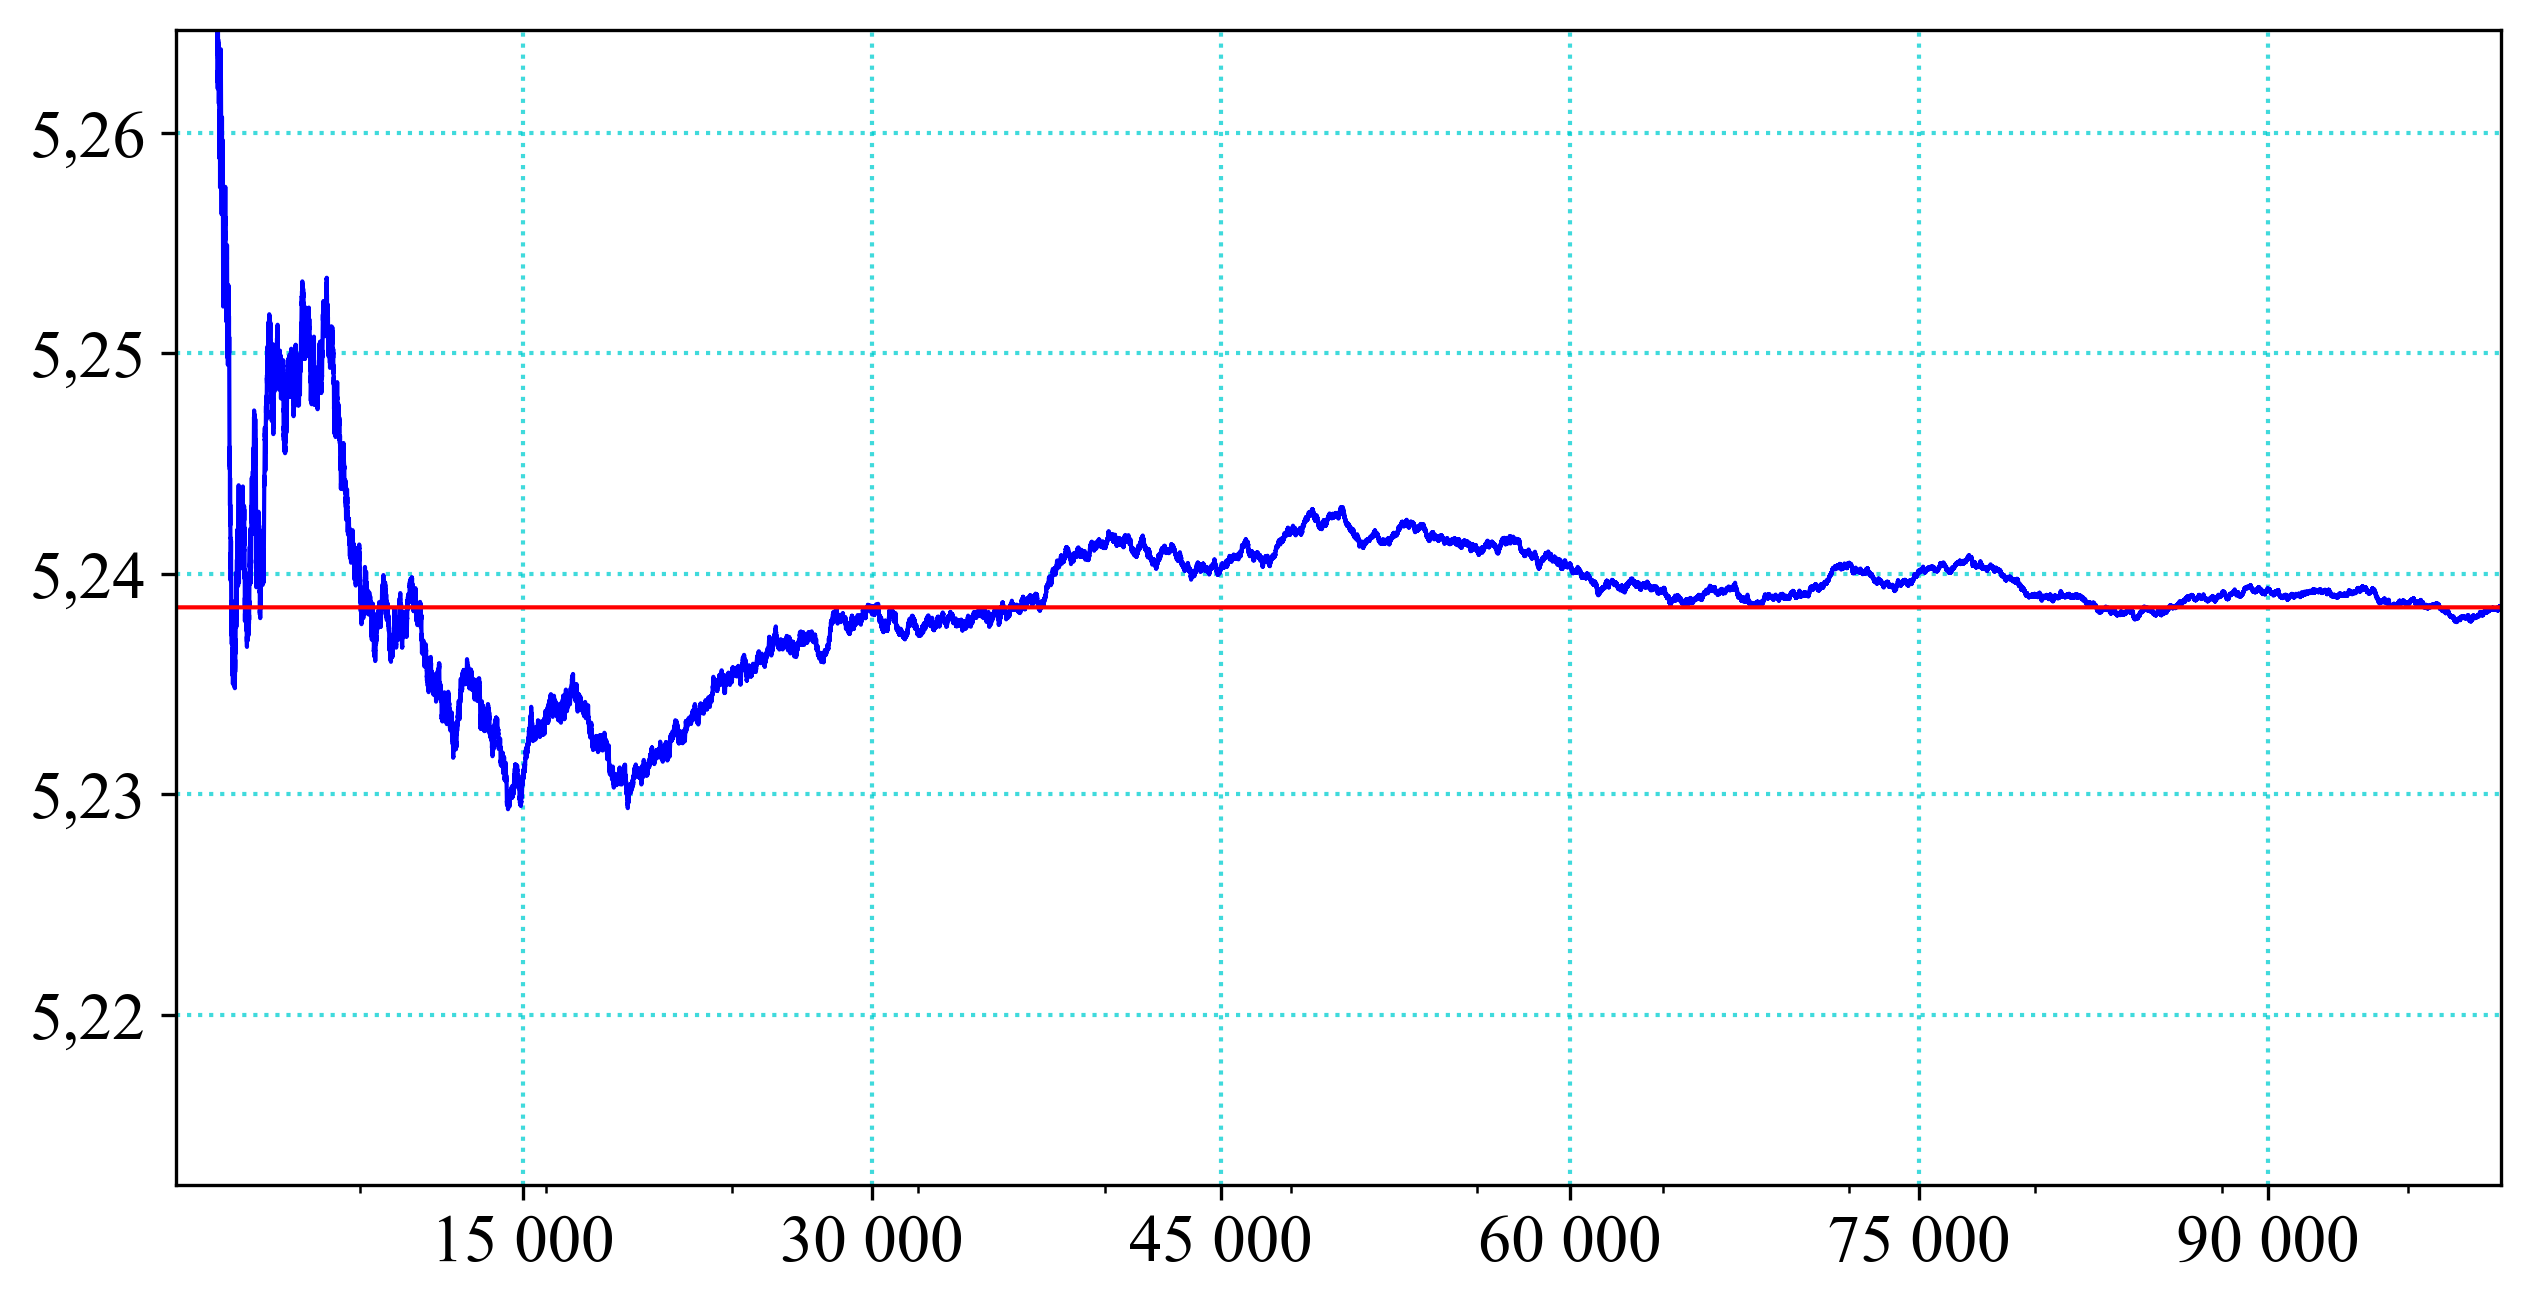

5.23847


In [61]:
rcParams['figure.figsize'] = (15, 5)
rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(labelsize=16)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(15))

plt.ylim(y[-1]*0.995, y[-1]*1.005)
plt.xlim(100, N)
plt.plot(x, y, color='b', lw=1)
plt.plot(x,[y[-1]]*len(x),color='r',lw=1)
plt.show()
print(y[-1])

# 6.9

## Analysis

In [44]:
x = np.arange(1,7)
px=np.full(6,1/6)

X = rv_discrete(values=(x,px))

In [49]:
y = []
py = []

for m in range(3,19):
    prob = 0

    for i in range(6):
        for j in range(6):
            for k in range(6):
                for l in range(6):
                    if sum((x[i], x[j], x[k], x[l]))-min((x[i], x[j], x[k], x[l]))==m:
                        prob += X.pmf(x[i]) * X.pmf(x[j]) * X.pmf(x[k]) * X.pmf(x[l])
    
    y.append(m)
    py.append(prob)
print(sum(py))
Y = rv_discrete(values=(y,py))

1.0000000000000027


In [50]:
Y.mean()

## Experiment

In [51]:
N=100_000
x = list(range(1,N+1))
hel = np.array([Y.rvs() for n in tqdm(range(1,N+1))])
le = np.array([sum(hel[0:i]) for i in tqdm(range(1,N+1))])
y = np.array([le[i-1]/i for i in tqdm(range(1,N+1))])

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

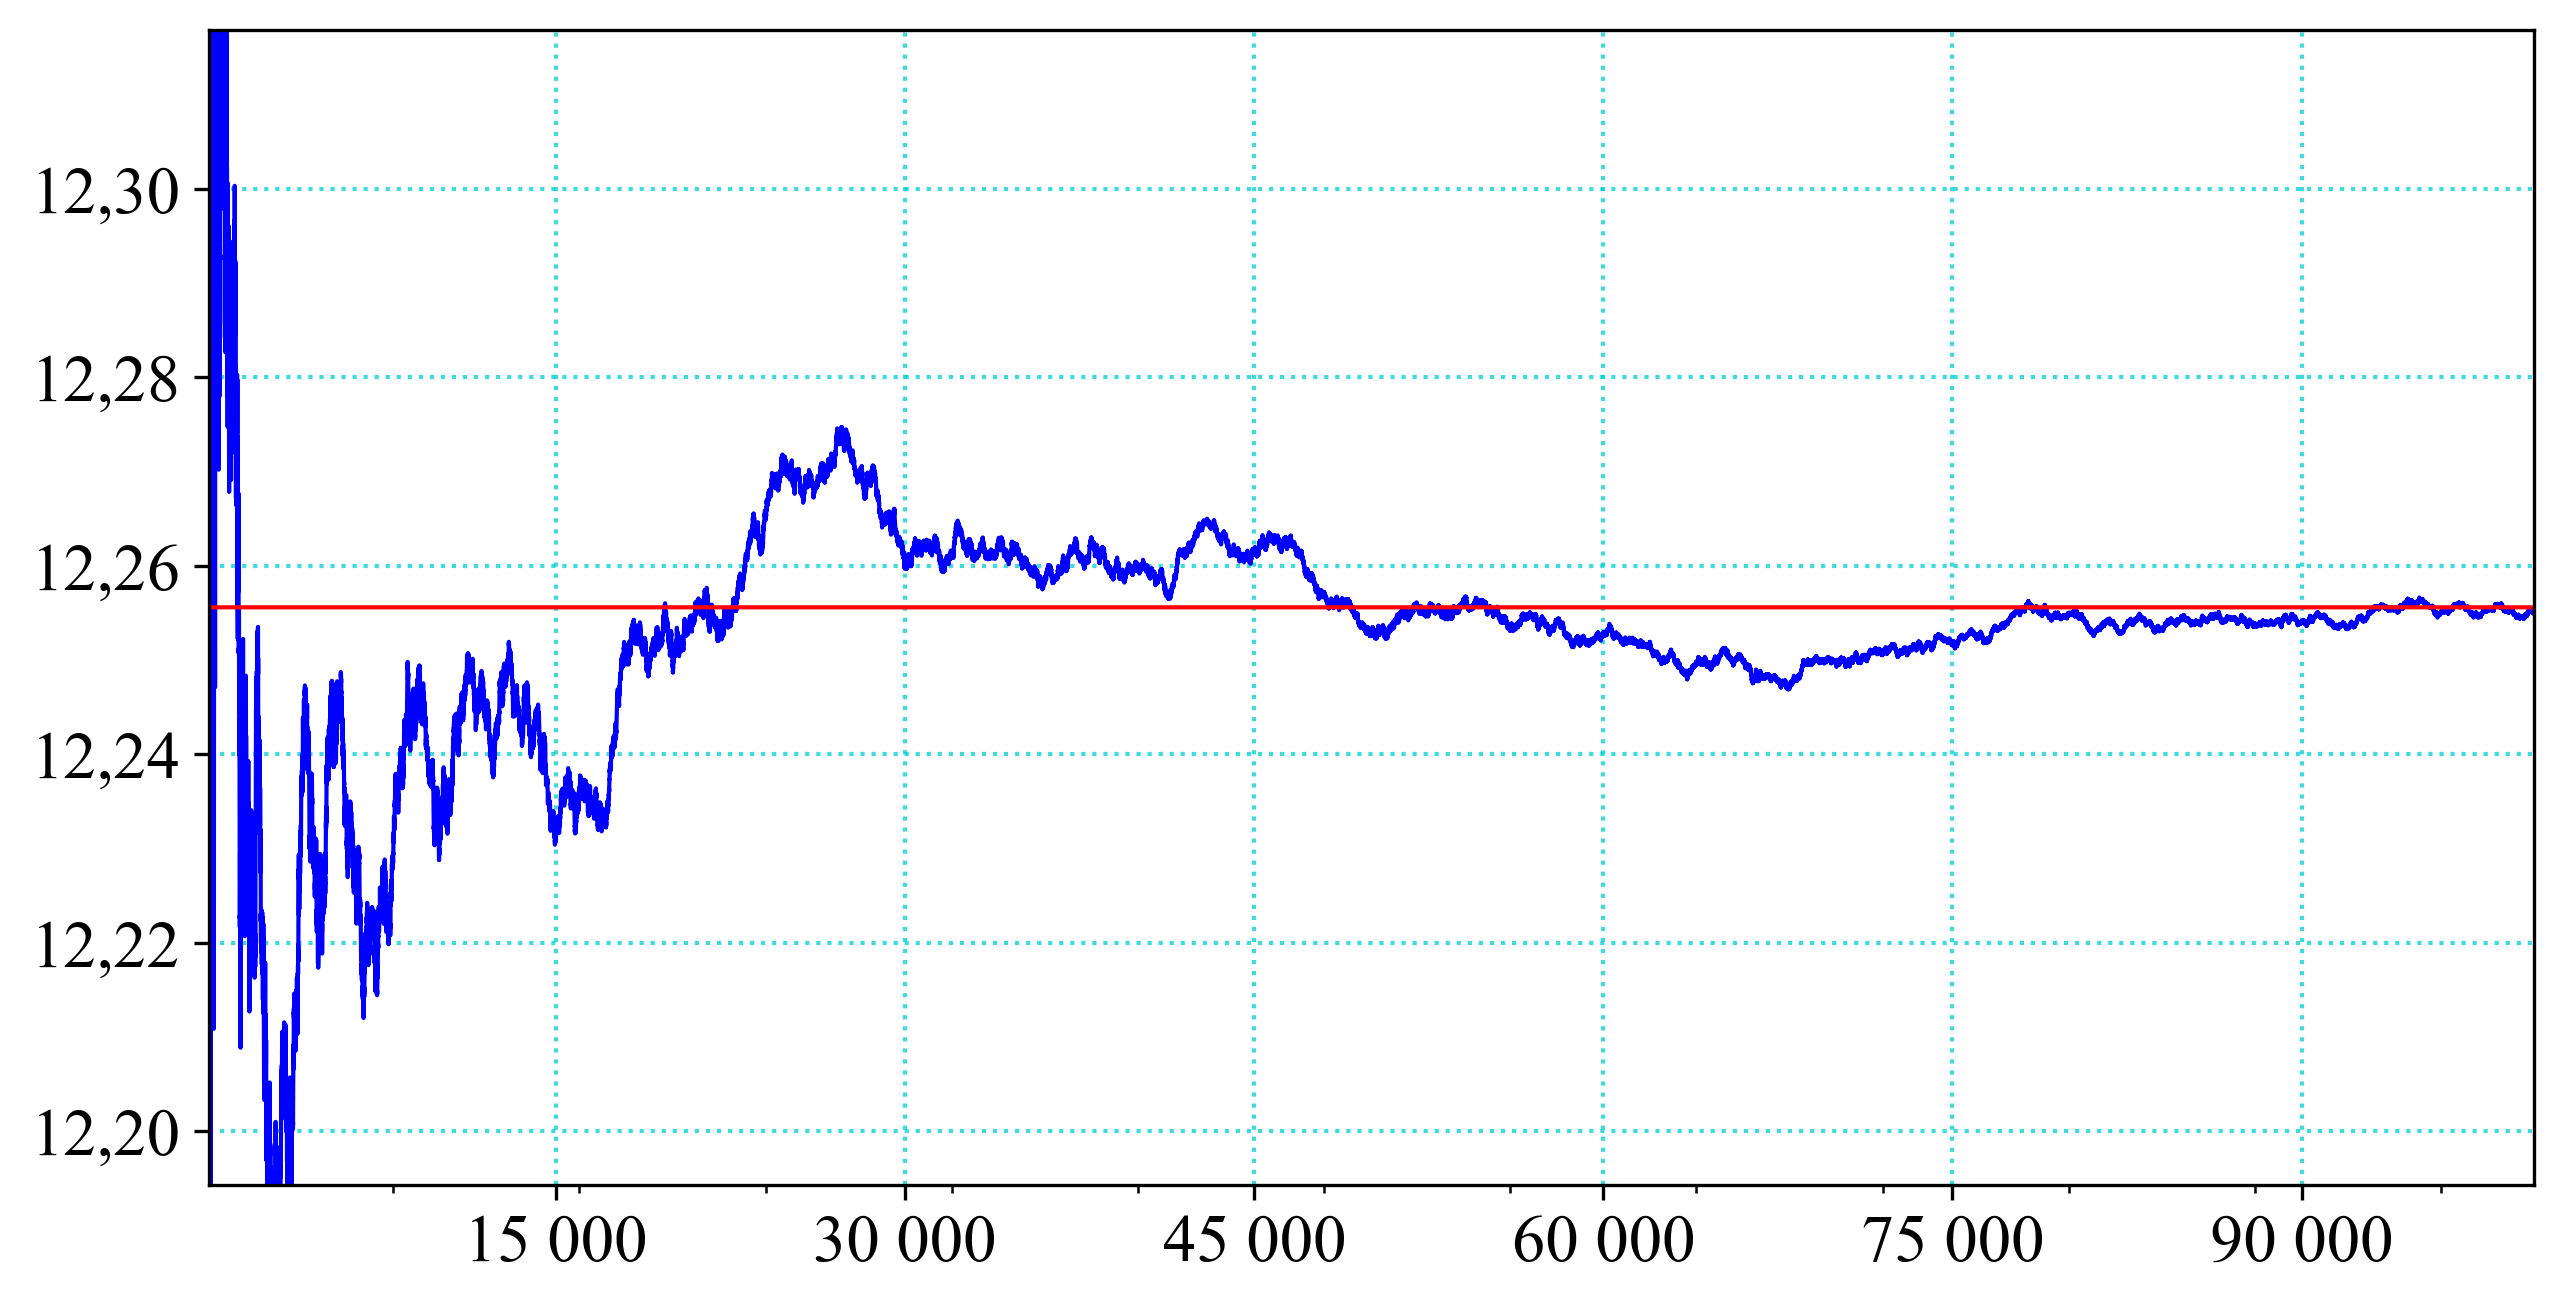

12.25561


In [54]:
rcParams['figure.figsize'] = (15, 5)
rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(labelsize=16)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(15))

plt.ylim(y[-1]*0.995, y[-1]*1.005)
plt.xlim(100, N)
plt.plot(x, y, color='b', lw=1)
plt.plot(x,[y[-1]]*len(x),color='r',lw=1)
plt.show()
print(y[-1])

# 6.10

## Analysis

In [115]:
x = np.array([1.02,1.002,0.96])
px = np.array([0.4,0.4,0.2])

X = rv_discrete(values=(x,px))

In [116]:
1000*X.mean()**100-1000

## Experiment

In [133]:
N=100_000
x = list(range(1,N+1))
hel = np.array([1000*ft.reduce((lambda x,y:x*y), X.rvs(size=100))-1000 for n in tqdm(range(1,N+1))])
le = np.array([sum(hel[0:i]) for i in tqdm(range(1,N+1))])
y = np.array([le[i-1]/i for i in tqdm(range(1,N+1))])

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

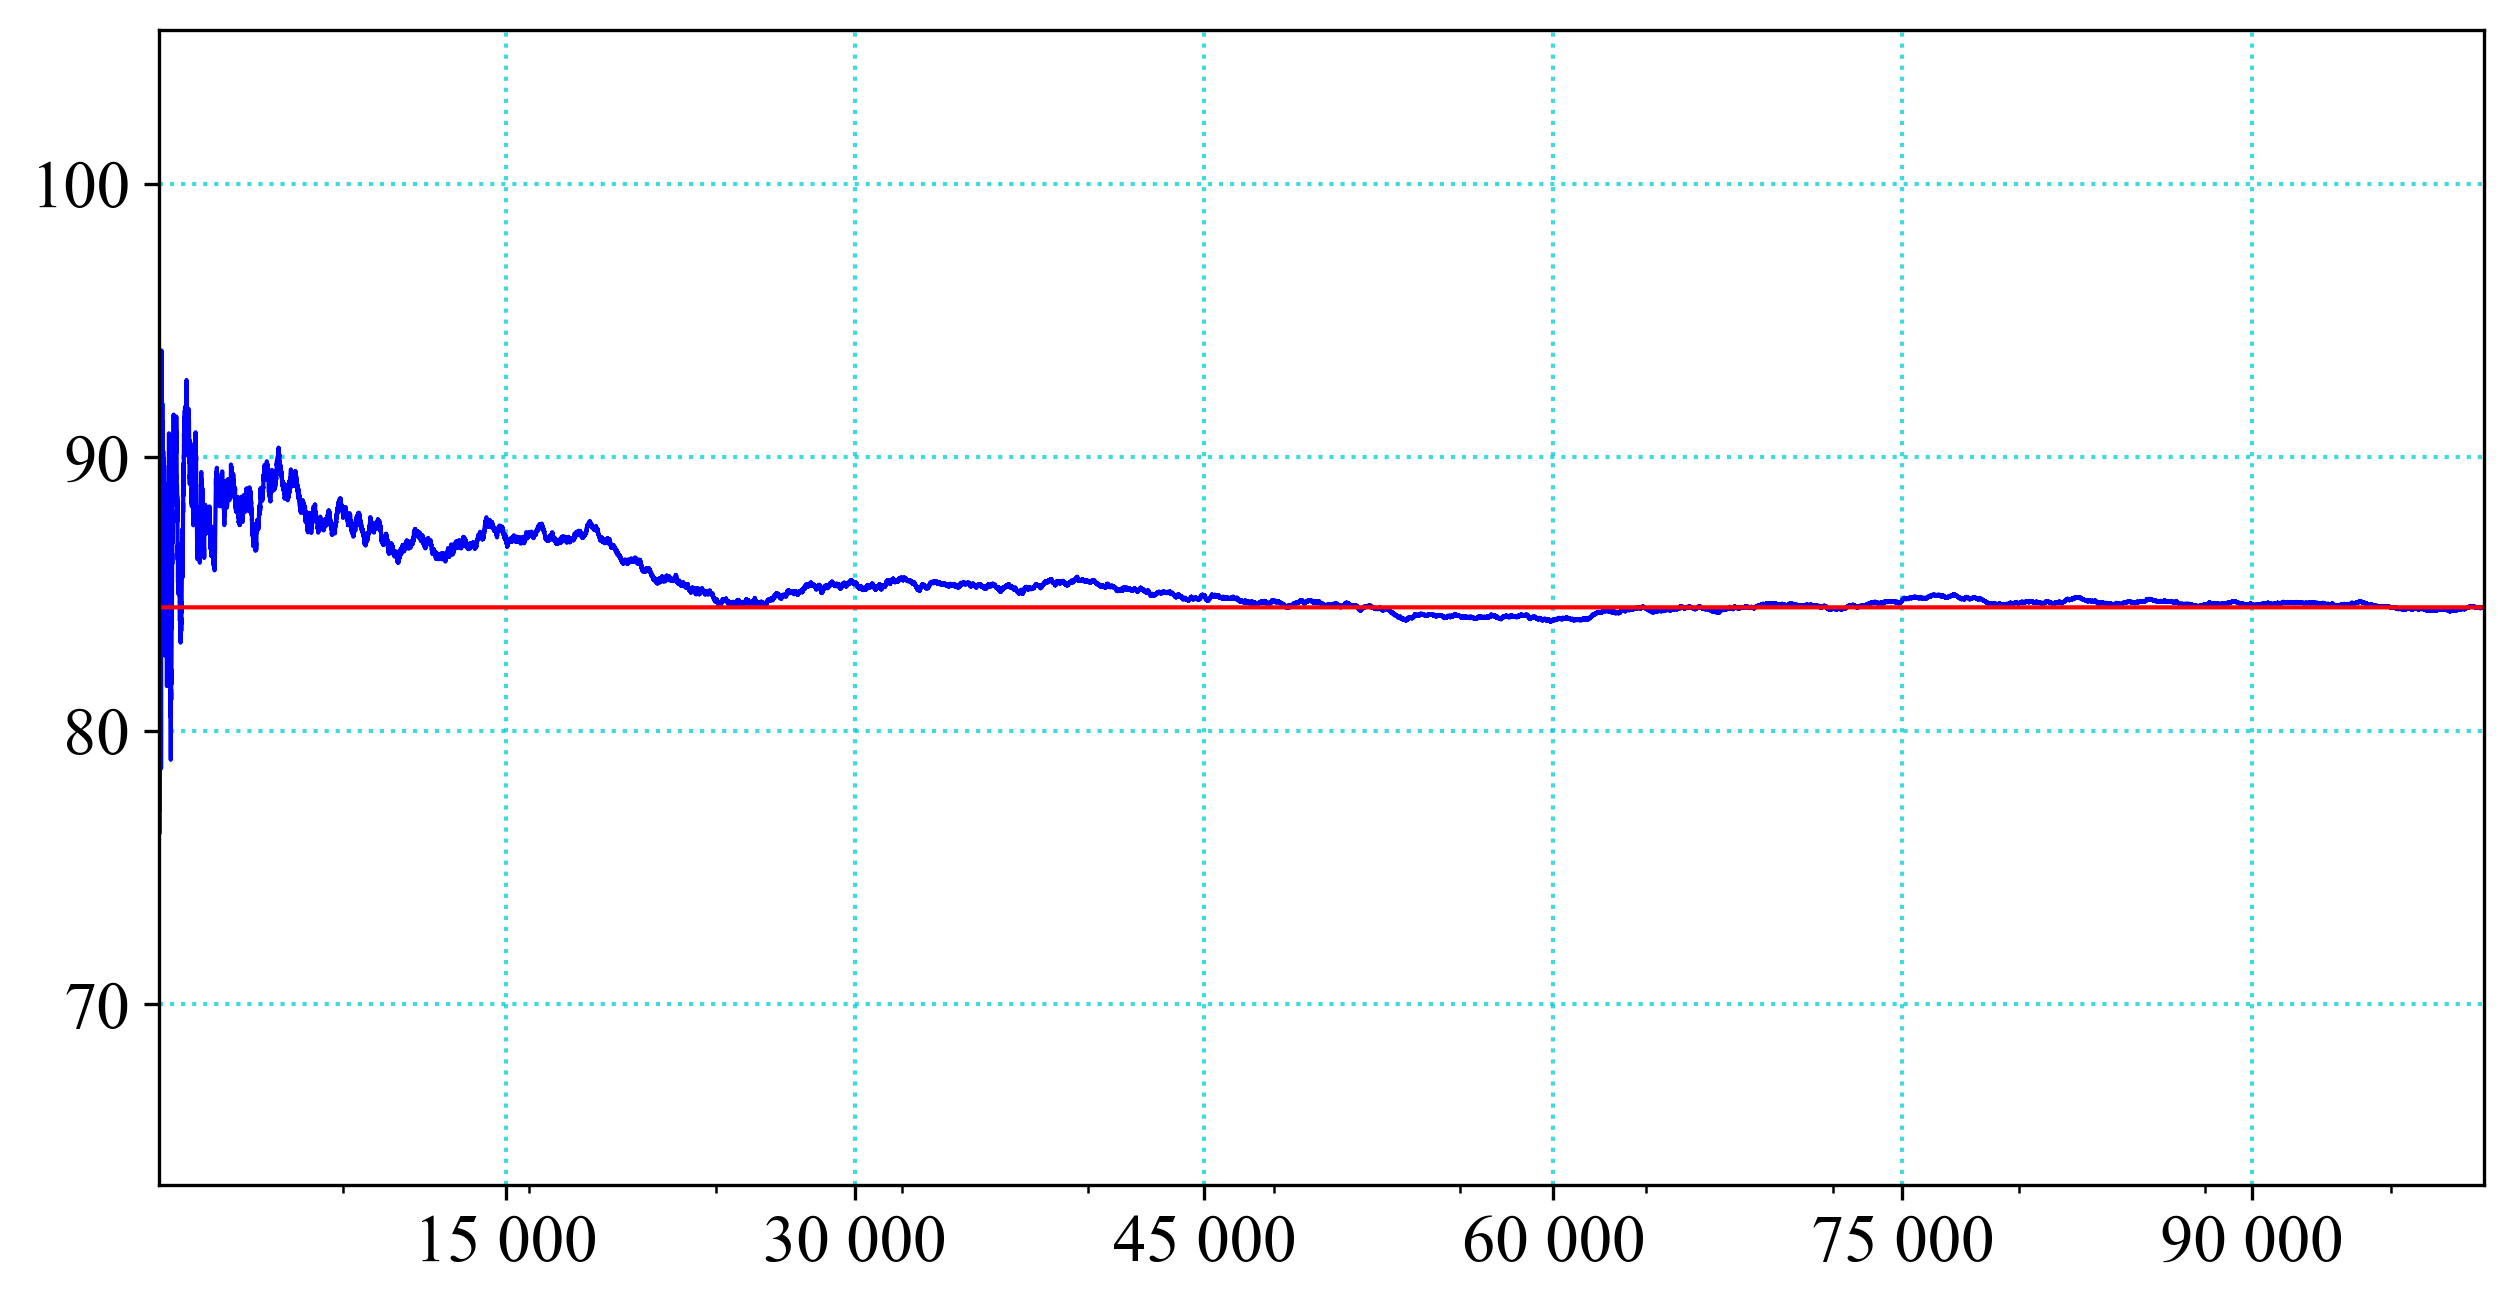

84.50611245128198


In [135]:
rcParams['figure.figsize'] = (15, 5)
rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(labelsize=16)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(15))

plt.ylim(y[-1]*0.75, y[-1]*1.25)
plt.xlim(100, N)
plt.plot(x, y, color='b', lw=1)
plt.plot(x,[y[-1]]*len(x),color='r',lw=1)
plt.show()
print(y[-1])

# 6.11

## Analysis

In [41]:
a=np.array([0,1])
pa=np.array([0.6,0.4])
b=np.array([0,1])
pb=np.array([0.7,0.3])
c=np.array([0,1])
pc=np.array([0.8,0.2])

A = rv_discrete(values=(a,pa))

B = rv_discrete(values=(b,pb))

C = rv_discrete(values=(c,pc))

In [75]:
g={2:0,4:0,8:0,0:0,6:0,10:0,12:0}
pg=[]
for i in range(2):
    for j in range(2):
        for k in range(2):
            X=i
            Y=j
            Z=k
            #if X+Y+Z!=3:
            g[2*X+4*Y+6*Z]+=(A.pmf(X)*B.pmf(Y)*C.pmf(Z))
print(sum(list(g.values())))
G=rv_discrete(values=(list(g.keys()),list(g.values())))

1.0


In [67]:
G.mean()

In [68]:
G.var()

In [66]:
print(f'E(V) = {2*A.mean()+4*B.mean()+6*C.mean()}')

E(V) = 3.2


# 6.13


## Analysis

In [70]:
x = np.array([3,6,9,10])
px = np.array([0.15,0.45,0.15,0.25])

X=rv_discrete(values=(x,px))

In [71]:
y = []
py = []

for m in range(9,31):
    prob = 0

    for i in range(4):
        for j in range(4):
            for k in range(4):
                if sum((x[i], x[j], x[k]))==m:
                    prob += (X.pmf(x[i]) * X.pmf(x[j]) * X.pmf(x[k]))
    
    y.append(m)
    py.append(prob)
Y = rv_discrete(values=(y,py))

In [72]:
Y.mean()

In [74]:
for i in x:
    print(1 - Y.cdf(x))

[1.       1.       0.996625 0.996625]
[1.       1.       0.996625 0.996625]
[1.       1.       0.996625 0.996625]
[1.       1.       0.996625 0.996625]
